In [1]:
import pandas as pd
import numpy as np
x=pd.read_csv("hongos_datos.csv")
y=pd.read_csv("hongos_target.csv")

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5,
                           scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train.values.ravel())
best_log_reg = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor precisión en validación cruzada:", grid_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Mejores hiperparámetros: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor precisión en validación cruzada: 0.9997560975609756


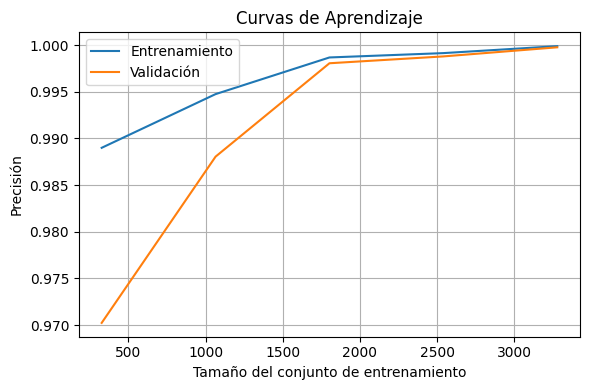

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    best_log_reg, X_train, y_train.values.ravel(), cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_scores_mean, label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, label="Validación")
plt.title("Curvas de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("modelo2_learning_curve.png")
plt.show()

Matriz de confusión:
 [[596   0]
 [  0 429]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       596
           1       1.00      1.00      1.00       429

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025


Precisión total: 1.0


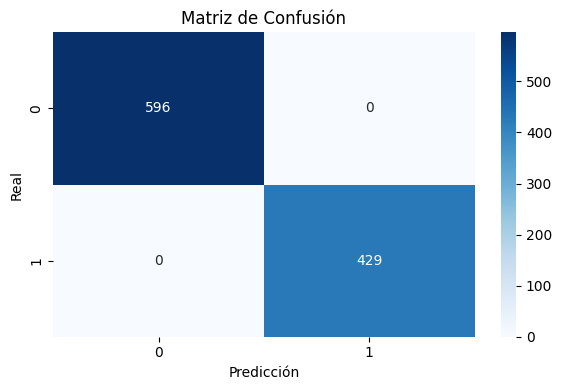

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

y_pred = best_log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nPrecisión total:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.savefig("modelo1_confusion_matrix.png")
plt.show()